In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/IDS576_Deep_Learning/Project_New

/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New


In [0]:
!ls

 Assignment3_final-Copy1.ipynb			  iter_new_21_lstm.pkl
 build_vocab.py					  kaggle.json
 DataLoader.ipynb				  parallel
 DataLoader.py					  parallel.tgz
 decoder_nmt_512_15_200K_e2_d2.pkl		  project_instructions.pdf
 dev						  __pycache__
 encoder_nmt_512_15_200K_e2_d2.pkl		 'Report_576_Team 8.pdf'
 eng-nld.txt					  Report_Nim_576.docx
 Evaluation_LanguageModel.xlsx			  resize.py
 files.zip					  RNN_Captioning.ipynb
 flickr8k					  sample_data
 flickr8k.zip					  script_training.py
 glove.6B.100d.txt				  speech.docx
 IDS_576_PROJECT_Team8.ipynb			  team8_final.zip
 Image_Cap_Attn					  test
'image captioning detail.pdf'			  train
 Image_Captioning_with_Translation_Taniya.ipynb   translation.pkl
 iter_24_cnn.pkl				  vocab.pkl
 iter_24_lstm.pkl				  Vocabulary.ipynb
 iter_new_21_cnn.pkl				  Vocabulary.py


In [0]:
!mkdir Image_Cap_Attn

mkdir: cannot create directory ‘Image_Cap_Attn’: File exists


In [3]:
%cd Image_Cap_Attn
!ls

/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/Image_Cap_Attn
flickr8k_build_vocab.py  flickr8k_models     model_eval.py   test.ipynb
flickr8k_data_loader.py  flickr8k_sample.py  model_train.py
flickr8k_model.py	 flickr8k_vocab.pkl  __pycache__


In [0]:
!chmod -R 777 *

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
!python model_train.py 

cuda:0
Namespace(attention_size=512, batch_size=64, caption_path='../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt', embed_size=300, encoded_image_size=14, hidden_size=512, image_dir='../flickr8k/Flickr_Data/Flickr_Data/Images/', image_size=224, learning_rate=0.0001, log_step=20, model_path='./flickr8k_models/', num_epochs=25, num_workers=4, save_step=1000, train_path='../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt', vocab_path='flickr8k_vocab.pkl')
Epoch [0/25], Step [20/469], Loss: 9.3119, Perplexity: 11068.6335
Epoch [0/25], Step [40/469], Loss: 7.2523, Perplexity: 1411.2991
Epoch [0/25], Step [60/469], Loss: 6.4841, Perplexity: 654.6579
Epoch [0/25], Step [80/469], Loss: 6.0447, Perplexity: 421.8779
Epoch [0/25], Step [100/469], Loss: 6.1024, Perplexity: 446.9397
Epoch [0/25], Step [120/469], Loss: 5.8043, Perplexity: 331.7374
Epoch [0/25], Step [140/469], Loss: 5.8928, Perplexity: 362.4198
Epoch [0/25], Step [160/469], Loss: 5.7

In [8]:
!ls

flickr8k_build_vocab.py  flickr8k_models     model_eval.py   test.ipynb
flickr8k_data_loader.py  flickr8k_sample.py  model_train.py
flickr8k_model.py	 flickr8k_vocab.pkl  __pycache__


In [6]:
!python model_eval.py

cuda:0
Namespace(attention_size=512, batch_size=1, caption_path='../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt', decoder_path='./flickr8k_models/decoder-24-213.ckpt', embed_size=300, encoded_image_size=14, encoder_path='./flickr8k_models/encoder-24-213.ckpt', hidden_size=512, image_dir='../flickr8k/Flickr_Data/Flickr_Data/Images/', image_size=224, num_workers=4, val_path='../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt', vocab_path='./flickr8k_vocab.pkl')
/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
 two brown dogs are playing in the snow .
 a brown and white dog is playing in a pool .
 a man in a blue shirt and blue shorts is on the street .
 a group of people are sitting on a bench .
 a football player in a red uniform is running .
 

In [12]:
import torch
import torch.nn as nn
import numpy as np
import os
import pickle
from flickr8k_data_loader import get_validation_loader 
from flickr8k_build_vocab import Vocabulary
from flickr8k_model import EncoderCNN, DecoderRNNWithAttention
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])

with open('./flickr8k_vocab.pkl', 'rb') as f:
        vocab = pickle.load(f)

image_dir = '../flickr8k/Flickr_Data/Flickr_Data/Images/'
caption_path = '../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
val_path = '../flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt'

batch_size = 1

data_loader = get_validation_loader(image_dir, caption_path, val_path, vocab, 
                             transform, batch_size,
                             num_workers=4)

encoder = EncoderCNN(14).eval()  # eval mode (batchnorm uses moving mean/variance)
decoder = DecoderRNNWithAttention(300, 512, 512, len(vocab)).eval()
encoder = encoder.to(device)
decoder = decoder.to(device)

encoder.load_state_dict(torch.load('./flickr8k_models/encoder-24-213.ckpt'))
decoder.load_state_dict(torch.load('./flickr8k_models/decoder-24-213.ckpt'))

cuda:0


<All keys matched successfully>

prediction:   a woman and a woman are smiling and smiling .


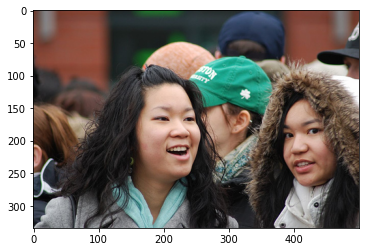

In [16]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

[[1, 4, 252, 32, 4, 252, 34, 164, 32, 164, 18, 2]]

prediction:   a group of children play in a field .


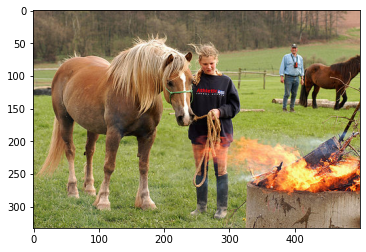

In [36]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/1.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a man in a red jacket is sitting on a bench .


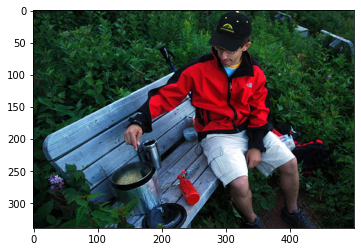

In [37]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/2.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a brown dog is running through a field .


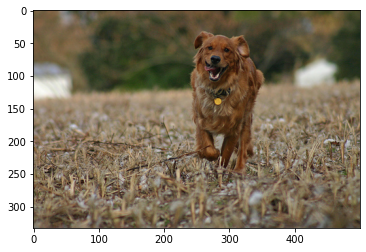

In [38]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/3.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a group of people sitting around a campfire at night .


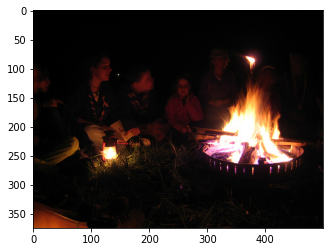

In [39]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/4.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a group of people sit in the snow .


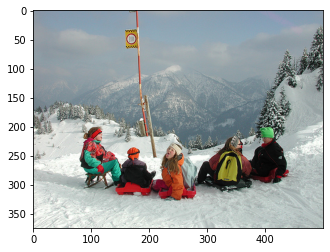

In [40]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/5.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a group of hot air balloons at night .


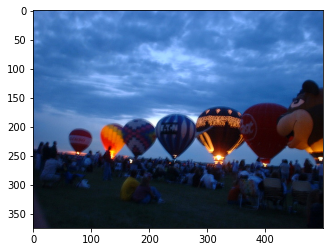

In [41]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/6.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a man in a yellow jacket is standing in the snow .


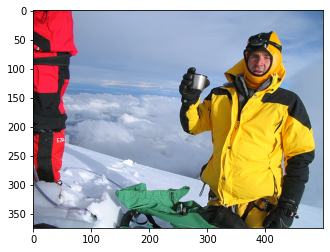

In [42]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/7.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   two dogs are running through the grass .


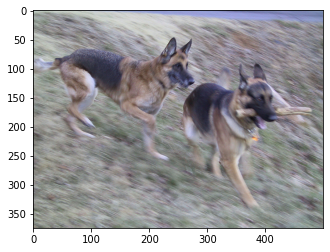

In [43]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/8.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a woman and a woman are walking through the snow .


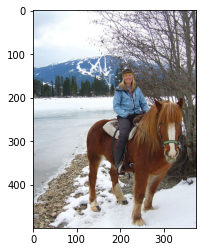

In [44]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/9.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a black and white bird is standing in the water .


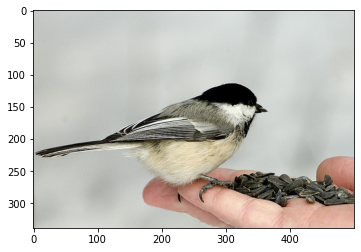

In [45]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/10.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a man wearing a black shirt and a white shirt with a white shirt and black jacket .


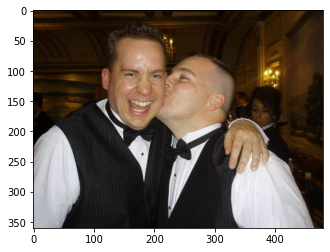

In [46]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/11.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a man in a wetsuit is surfing .


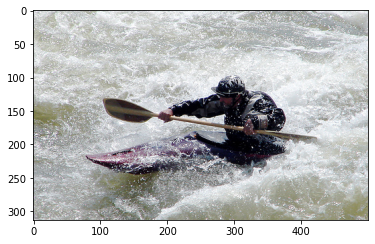

In [47]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/12.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a group of people walking in a field .


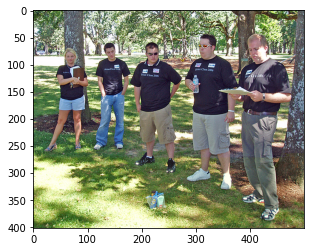

In [48]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/13.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a mountain mountain .


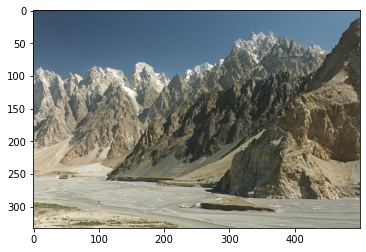

In [49]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/14.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a man is riding a bicycle down a hill .


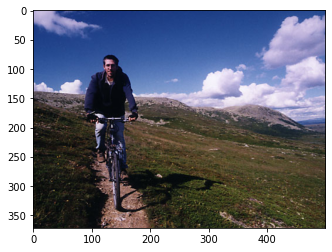

In [50]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/15.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a brown dog is running through the snow .


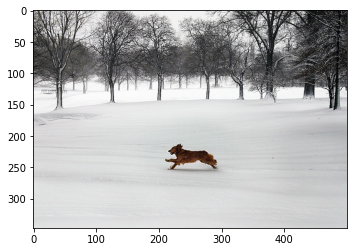

In [51]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/16.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   two dogs play in the grass .


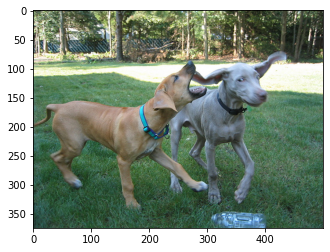

In [52]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/train_image_pred/17.jpg', 'r')
test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   two brown dogs are playing in the snow .


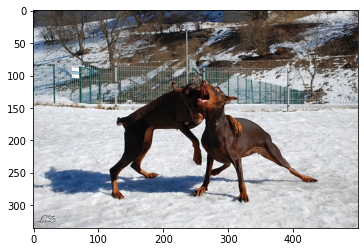

In [54]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a brown and white dog is playing in a pool .


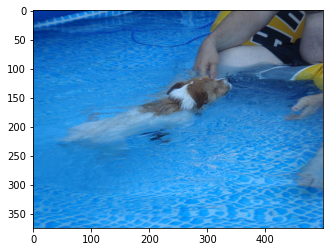

In [55]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a man in a blue shirt and blue shorts is on the street .


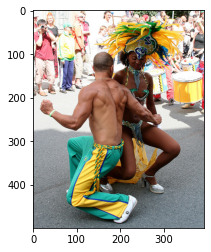

In [56]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a group of people are sitting on a bench .


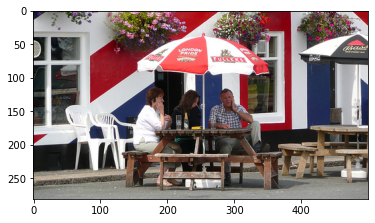

In [57]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a football player in a red uniform is running .


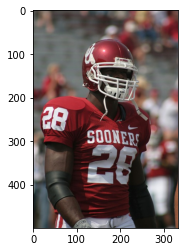

In [58]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a brown dog is running through the grass .


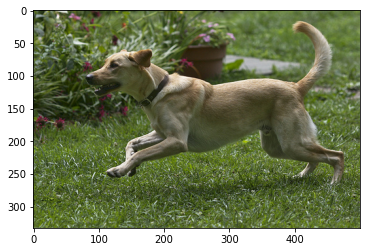

In [59]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))

prediction:   a woman and a woman are smiling and smiling .


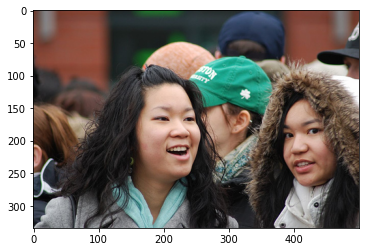

In [60]:
from PIL import Image, ImageFile
import numpy as np
from matplotlib.pyplot import imshow
from torch.autograd import Variable

# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/3385593926_d3e9c21170.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2677656448_6b7e7702af.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/311146855_0b65fdb169.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/1258913059_07c613f7ff.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/241347760_d44c8d3a01.jpg', 'r')
# pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2654514044_a70a6e2c21.jpg', 'r')
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/IDS576_Deep_Learning/Project_New/test/2339106348_2df90aa6a9.jpg', 'r')

test = np.asarray(pil_im)
test = transform(pil_im)
test = test.unsqueeze(0)

test = Variable(test).cuda()
features = encoder(test)
sampled_seq = decoder.sample_beam_search(features, vocab, device)
sampled_seq = sampled_seq[0][1:-1]

imshow(np.asarray(pil_im))
print("prediction: ", vocab.get_sentence(sampled_seq))